_____________
Practice and notes from online course: 
[Python for Financial Analysis and Algorithmic Trading](https://www.udemy.com/python-for-finance-and-trading-algorithms/learn/v4/content) <br>
Comments are just my understanding, mostly
# Capital Asset Pricing Model (CAPM) #
Like the explanation of CAPM from this [link](https://www.investopedia.com/articles/06/capm.asp) : CAPM "is by no means a perfect theory. But the spirit of CAPM is correct". <br>
#### * Systematic Risk (market risks), cannot be diversified away. ####
#### * Unsystematic Risk (specific risk), can be diversified away.####
#### For an individul stock, according to [link](https://www.investopedia.com/articles/06/capm.asp), CAPM expects the return to be: ####
#### $ \bar{r_a} = r_f + \beta_a(\bar{r_m} - r_f) $
where $\bar{r_a}$ is stock expected return;  $\bar{r_m}$ the expected return of market; ${t_f}$ is risk free rate, $(\bar{r_m} - r_f)$ is called _Equity Market Premium_. 
#### while the lecture gives the CAPM for a portfolio as :
####  $ r_p(t) = \beta_pr_m(t) + \sum\limits_{i}^{n}w_i \alpha_i(t)$ <br>
 
_________________
## how to understand lecturer's $\beta$ calcuation ##
I am puzzled by the method, introduced by lecturer, of using stats.linregress to fit daily return data to calculate $\beta$ using market data. With the example of comparing AAPL daily returns to SPY daily returns, using 7 years data for the fitting, the β with (SPY, AAPL) as independent and dependent variables, and the β with (AAPL, SPY) as independent and dependent variables, are not reciprocal to each other. That seems telling me that such linregress is not the right way to calculate β (Or the $\beta$ does not have the exact same meaning as in CAPM). This does not work even with quartly, or yearly avergaged (or last point) data. The large volatility in market data is probally to blame.
 
It seems that using the ratio of daily avergad returns (or yearly returns = 252 daily returns) might be a much better way to calulate β . If $r_f$ is not zero, then it can be subtracted during this "manually" calculations. 

If people really want to use linregress fitting to calculate β , the the cumulated return seems a much better candidate. However since (1+a)^n is not equivalent to (1 + a n) if a>0.5, it might be even better to create "cumulated log return" for this purpose. Make sense ???
<br>
<br>

In [11]:
from scipy import stats
import pandas as pd
import numpy as np
import pandas_datareader as web  # also tried pandas_datareader.data

In [15]:
# before made it work with 'yahoo', also tried using quandle, only worked for AAPL:
import quandl

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
spy_etf = web.DataReader('SPY', 'yahoo')  # tried google, morningstar, fred, all did not work, but yahoo worked!!!!

In [20]:
start = pd.to_datetime('2010-01-04')
end = pd.to_datetime('2017-07-15')
aapl = quandl.get('WIKI/AAPL', startdate=start, enddate=end)
#help(quandl.get)

In [ ]:
with open('quandlfile.txt', 'r') as qfile:   # saved the key to a file
    quandlkey = qfile.read()
spy_etf = quandl.get('EOD/SPY', api_key=quandlkey, startdate=start, enddate=end)
# but it did not work. It needs register. Giveup

In [31]:
spy_etf.head(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,113.389999,111.510002,112.370003,113.330002,118944600.0,95.528107
2010-01-05,113.680000,112.849998,113.260002,113.629997,111579900.0,95.780975
2010-01-06,113.989998,113.430000,113.519997,113.709999,116074400.0,95.848396


In [42]:
spy_etf.tail(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-09-11,289.549988,286.980011,287.369995,289.049988,50530500.0,289.049988
2018-09-12,289.799988,288.230011,289.059998,289.119995,59810800.0,289.119995
2018-09-13,291.040009,290.000000,290.320007,290.829987,50992300.0,290.829987


In [32]:
aapl.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,2093900.0,0.0,1.0,0.422706,0.424470,0.422706,0.422706,117258400.0
1980-12-15,27.38,27.38,27.25,27.25,785200.0,0.0,1.0,0.402563,0.402563,0.400652,0.400652,43971200.0
1980-12-16,25.37,25.37,25.25,25.25,472000.0,0.0,1.0,0.373010,0.373010,0.371246,0.371246,26432000.0
1980-12-17,25.87,26.00,25.87,25.87,385900.0,0.0,1.0,0.380362,0.382273,0.380362,0.380362,21610400.0
1980-12-18,26.63,26.75,26.63,26.63,327900.0,0.0,1.0,0.391536,0.393300,0.391536,0.391536,18362400.0


In [34]:
aapl.tail(3)

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-03-23,168.39,169.92,164.94,164.94,40248954.0,0.0,1.0,168.39,169.92,164.94,164.94,40248954.0
2018-03-26,168.07,173.10,166.44,172.77,36272617.0,0.0,1.0,168.07,173.10,166.44,172.77,36272617.0
2018-03-27,173.68,175.15,166.92,168.34,38962839.0,0.0,1.0,173.68,175.15,166.92,168.34,38962839.0


In [35]:
# Somehow the data is 

spy_etf.to_csv('spy_etf.csv')

In [36]:
aapl.to_csv('aapl_save.csv')

In [37]:
print(type(aapl.index[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [143]:
columns = ['High', 'Low', 'Open', 'Close', 'Volume', 'Adj. Close']
aapl2 = aapl.loc[start:end, columns]
aapl2.columns = ['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close']

In [144]:
spy_etf2 = spy_etf.loc[start:end]

In [145]:
aapl2.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,214.50,212.38,213.43,214.01,17633200.0,27.503268
2010-01-05,215.59,213.25,214.60,214.38,21496600.0,27.550818
2010-01-06,215.23,210.75,214.38,210.97,19720000.0,27.112585
2010-01-07,212.00,209.05,211.75,210.58,17040400.0,27.062465
2010-01-08,212.00,209.06,210.30,211.98,15986100.0,27.242385


In [146]:
print(spy_etf2.shape, aapl2.shape)

(1896, 6) (1896, 6)


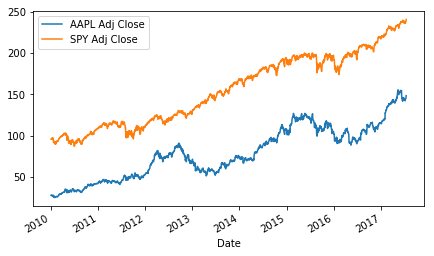

In [147]:
aapl2['Adj Close'].plot(figsize=(7,4), label='AAPL Adj Close')
spy_etf2['Adj Close'].plot(label='SPY Adj Close')
plt.legend();

# Cumulative return #

C:\Users\huang\Anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


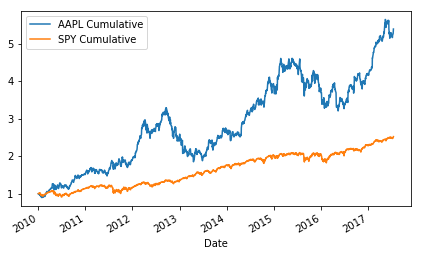

In [148]:
aapl2['Cumulative'] = aapl2['Adj Close']/aapl2['Adj Close'].iloc[0]
spy_etf2['Cumulative'] = spy_etf2['Adj Close']/spy_etf2['Adj Close'].iloc[0]
aapl2['Cumulative'].plot(figsize=(7,4), label='AAPL Cumulative')
spy_etf2['Cumulative'].plot(label='SPY Cumulative')
plt.legend();

# Daily Return #

C:\Users\huang\Anaconda3\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


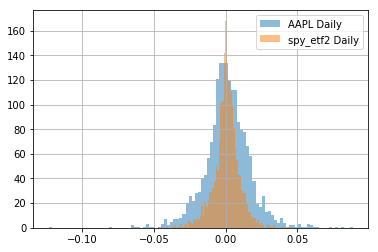

In [149]:
aapl2['Daily Return'] = aapl2['Adj Close'].pct_change()
spy_etf2['Daily Return'] = spy_etf2['Adj Close'].pct_change()
aapl2['Daily Return'].hist(bins=100, label='AAPL Daily', alpha=0.5)
spy_etf2['Daily Return'].hist(bins=100, label='spy_etf2 Daily', alpha=0.5)
plt.legend()

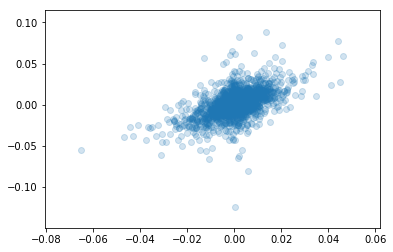

In [150]:
plt.scatter(spy_etf2['Daily Return'], aapl2['Daily Return'], alpha=0.2);

# Does AAPL fit CAPM ? not sure #

In [151]:
beta,alpha,r_value,p_value,std_err = stats.linregress(spy_etf2['Daily Return'].iloc[1:], aapl2['Daily Return'].iloc[1:])

In [152]:
print(beta,alpha,r_value,p_value,std_err)

0.950211694398229 0.0005139435961842749 0.5555683327689955 6.144889418033772e-154 0.03268546183892011


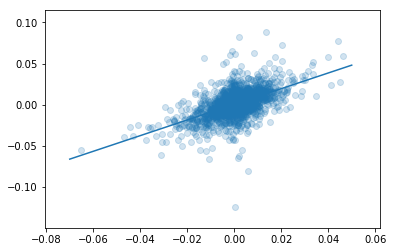

In [153]:
x=np.linspace(-0.07, 0.05, 100)
y = alpha + beta*x
plt.scatter(spy_etf2['Daily Return'], aapl2['Daily Return'], alpha=0.2)
plt.plot(x, y)

In [163]:
print(spy_etf2['Daily Return'].mean(), aapl2['Daily Return'].mean(), aapl2['Daily Return'].mean()/spy_etf2['Daily Return'].mean())

0.0005332598039640233 0.001020653298063397 1.9139888108503598


In [164]:
beta,alpha,r_value,p_value,std_err = stats.linregress(aapl2['Daily Return'].iloc[1:], spy_etf2['Daily Return'].iloc[1:])
print(beta,alpha,r_value,p_value,std_err)

0.32482885045020826 0.00020172216644587628 0.5555683327689955 6.144889418033772e-154 0.011173490137157753


### Lecturer conducted the message that this is the way of calculate $\beta$ and $r_f$, but it obviously does not work !! ### <br>
I suspect that given the large noise on daily returns (or even quarterly returns), the linregress fit will not meanful. For example, with (AAPL, SPY) as independent and dependent variables, linregress gives $\beta$ = 0.325, which seems hint that with (SPY, AAPL) as independent and dependent variables, the $\beta$ would be about 1/0.325=3.08, but the linregress gives $\beta$ of 0.95. That seems telling me that such linregress is not the right way to calculate $\beta$
In the following, I will show that even I am using quartly, or yearly avergaged or last data for the linregress fitting, the result is bad.
It seems that the ratio of daily avergad returns, (or yearly returns = 252 * daily returns) might be a much better apporoximation of $\beta$. If $r_f$ is not zero, then if can be subtracted from the averaged daily (or yearly) returns during this "manually" calculations.
If really want to use linregress fit to calculate $\beta$, the the cumulated return seems a much better candidate. However since (1+a)^n is not equivalent to (1 + a * n) if a>0.5, it might be even better to create "cumulated log return" for this purpose.

## Test resample the data quarterly 

In [81]:
print(type(spy3.index[0]), type(aapl3.index[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'> <class 'pandas._libs.tslibs.timestamps.Timestamp'>


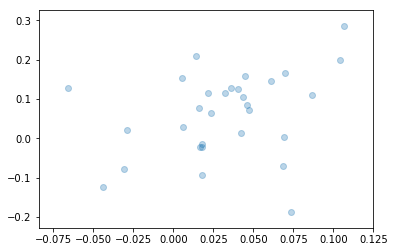

In [155]:
spy3 = spy_etf2[['Close', 'Adj Close']]
aapl3 = aapl2[['Close','Adj Close']]
spy3 = spy3.resample(rule='Q').mean()  #last()
aapl3 = aapl3.resample(rule='Q').mean() #last()   #, closed='left', label='left', how='last')
spy3['Q Return'] = spy3['Adj Close'].pct_change()
aapl3['Q Return'] = aapl3['Adj Close'].pct_change()
plt.scatter(spy3['Q Return'], aapl3['Q Return'], alpha=0.3)

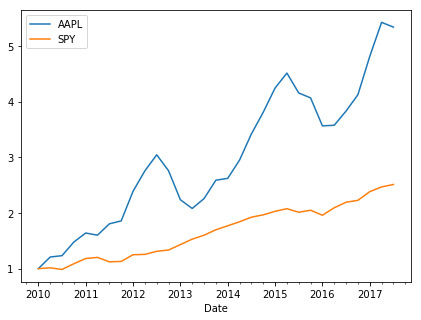

In [156]:
spy3['Cumulative'] = spy3['Adj Close']/spy3['Adj Close'].iloc[0]
aapl3['Cumulative'] = aapl3['Adj Close']/aapl3['Adj Close'].iloc[0]
#plt.scatter(spy3['Cumulative'], aapl3['Cumulative'])
aapl3['Cumulative'].plot(label = 'AAPL')
spy3['Cumulative'].plot(figsize=(7,5), label = 'SPY')
plt.legend();

In [157]:
print(spy3['Q Return'].iloc[1:].shape, aapl3['Q Return'].iloc[1:].shape)
beta,alpha,r_value,p_value,std_err = stats.linregress(spy3['Q Return'].iloc[1:], np.squeeze(aapl3['Q Return'].iloc[1:]))
# there was once that squeeze has to be used becausee the series dimension becomes (30,1) instead of (30,)

(30,) (30,)


In [158]:
print(beta,alpha,r_value,p_value,std_err)

0.8615970311722742 0.035376419221888035 0.32246109894644637 0.08222667632183653 0.4779763616101809


In [159]:
beta,alpha,r_value,p_value,std_err = stats.linregress(spy3['Cumulative'].iloc[1:], np.squeeze(aapl3['Cumulative'].iloc[1:]))
print(beta,alpha,r_value,p_value,std_err)

2.412978094763162 -1.0261845525567304 0.9385126226952862 1.8521219918549873e-14 0.16774962063474255


In [165]:
beta,alpha,r_value,p_value,std_err = stats.linregress(np.squeeze(aapl3['Cumulative'].iloc[1:]), spy3['Cumulative'].iloc[1:])
print(beta,alpha,r_value,p_value,std_err)

0.3650285698282882 0.575771321381032 0.9385126226952862 1.8521219918549873e-14 0.025376692910073075


** Use cumulative return, the $\beta$ of linregress(SPY, AAPL) is close to the reciprocal of the $\beta$ of linregress(AAPL, SPY): the multiplication of the two $\beta$s are about 0.88.**

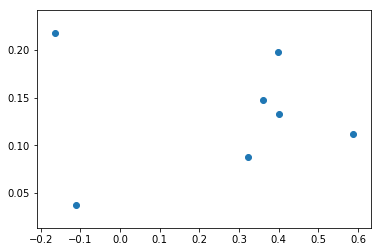

In [162]:
spy4 = spy_etf2[['Close', 'Adj Close']]
spy4 = spy4.resample(rule='A').mean()
aapl4 = aapl2[['Close','Adj Close']]
aapl4 = aapl4.resample('A').mean()
spy4['Cumulative'] = spy4['Adj Close']/spy4['Adj Close'].iloc[0]
aapl4['Cumulative'] = aapl4['Adj Close']/aapl4['Adj Close'].iloc[0]
spy4['Y Return'] = spy4['Cumulative'].pct_change()
aapl4['Y Return'] = aapl4['Cumulative'].pct_change()
plt.scatter(aapl4['Y Return'],spy4['Y Return'])

In [161]:
beta,alpha,r_value,p_value,std_err = stats.linregress(spy4['Y Return'].iloc[1:], np.squeeze(aapl4['Y Return'].iloc[1:]))
print(beta,alpha,r_value,p_value,std_err)

0.012526838537815898 0.2550269877063083 0.0027557391118336245 0.9953217297474555 2.032903335052087
